# Проект по андану

**Тема проекта:**

Мы исследуем влияние различных показателей на количество убийств среди профессиональных игроков по PUBG по турнирам разных уровней:
S, A, B, C. То есть kills является таргетым, который мы будем пытаться предсказывать на основе можества разных характеристик.


**Источник:** https://twire.gg/en/pubg

> twire.gg - сайт, разработанный в кооперации с разработчиками, репрезентующий любому желающему полную, подробную и проверенную статистику по любому из официальных или полуофициальных турниров. Данные на сайт приходят сразу после окончания матчей напрямую с серверов игры, что позволяет получать на 100% достоверную информацию по любому из пунктов статистики

>Общий смысл киберспортивного PUBG и правила: 
PUBG - королевская битва, в которой 64 игрока в 16 командах высаживаются на карту 8х8 км, после чего появляется игровая зона, которая стимулирует игроков сближаться друг с другом постоянно уменьшаясь, что наносит урон, который увеличивается по ходу матча. 

>Для исключения фактора случайности зоны в финалах и в целом по ходу турнира проводят достаточно много игр, в финалах, например, обычно 18. 

>Для победы команды по ходу этих 18 матчей игрокам необходимо устронять соперников (делать киллы) и занимать как можно более высокие позиции. За каждый килл начисляется 1 очко, за первое место - 10 очков, за второе - 6 и так далее.

## Гипотеза

Как можно увидеть из правил проведения турниров - за первое место присуждается всего 10 очков, что равняется 10 киллам, при этом занять первое место, судя по статистике побед достаточно сложно, в сравнении с киллами. Именно поэтому для исследования основных данных мы берем киллы - как более важный фактор в победе команды, в сравнении с очками за место. Наша гипотиза: помимо понятных факторов, таких как урон, нанесённый по врагам, на кол-во киллов могут сильно влиять неочевидные факторы, такие как используемый тип оружия, кол-во выброшенных гранат, урон от зоны и т.д.

## Сбор данных

Мы запарсили данные на основании 17 турниров топ тира, к несчастью супчик не зарешал, не смотря на все усилия и мы пришли к более тяжелой артилерии. Похоже сайт кидал какую то капчу, но silenium зарешал.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install XlsxWriter

**Шаг 1**

Мы написали функцию, которая объединяет все турики и возвращает один датафрейм

In [6]:
def parse_tournament_table(url):
    """Парсит таблицу турнира по заданному URL и возвращает DataFrame."""

    driver = webdriver.Chrome()
    driver.get(url)

    table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'table.AdvancedTable_table__2IV4Y')))

    html_table = table.get_attribute('outerHTML')
    df = pd.read_html(html_table)[0]
    driver.quit()

    return df


# Список ссылок на наши турики

tournament_urls = ['https://twire.gg/en/pubg/tournaments/tournament/1441/pubg-global-championship-2023/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1610/pubg-salary-cup-season-2-2024/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1566/pubg-emea-championship-spring-2024/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1463/pubg-emea-championship-fall-2023/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1389/pubg-global-series-2-2023-emea-qualifier/player-stats?round=grand-finals&group=',
'https://twire.gg/en/pubg/tournaments/tournament/1535/vikrvi-invitational-2/player-stats?round=&group=','https://twire.gg/en/pubg/tournaments/tournament/1493/cg-series-pubg-americas-challenge/player-stats?round=finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1358/the-rotation/player-stats?round=grand-final&group=','https://twire.gg/en/pubg/tournaments/tournament/1412/pubg-nations-cup-2023/player-stats?round=league&group=','https://twire.gg/en/pubg/tournaments/tournament/1577/pubg-challenger-rumble-2024-phase-1/player-stats?round=grand-finals&group=group-1','https://twire.gg/en/pubg/tournaments/tournament/1475/pubg-challenger-rumble-2023-season-2/player-stats?round=finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1332/pubg-global-series-1-2023/player-stats?round=grand-finals&group=',
'https://twire.gg/en/pubg/tournaments/tournament/1394/pubg-global-series-2-2023-americas-qualifier/player-stats?round=&group=','https://twire.gg/en/pubg/tournaments/tournament/1356/pubg-global-series-2-2023/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1595/pubg-global-series-apac-qualifiers-2024-phase-1/player-stats?round=playoff-stage&group=','https://twire.gg/en/pubg/tournaments/tournament/1619/balkan-pro-hub-league-season-2/player-stats?round=grand-finals&group=','https://twire.gg/en/pubg/tournaments/tournament/1567/pubg-americas-series-3/player-stats?round=grand-finals&group=']

**Шаг 2**  Функция для добавления всех турниров в all_tournament_data

In [7]:
all_tournament_data = []
for url in tournament_urls:
    df = parse_tournament_table(url)
    df['Tournament URL'] = url
    all_tournament_data.append(df)

**Шаг 3**

Для удобства мы решили сохранить готовый датафрейм в файл Excel, с которым будем работать через pandas

In [11]:
combined_df = pd.concat(all_tournament_data, ignore_index=True)

excel_file = 'combined_pubg_data_new.xlsx'
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads')
excel_path = os.path.join(downloads_path, excel_file)

combined_df.to_excel(excel_path, index=False)

print(f"Файл успешно сохранен в: {excel_path}")

Файл успешно сохранен в: C:\Users\montl\Downloads\combined_pubg_data_new.xlsx


>Перед дальнейшим анализом стоит отметить, что предварительно были удалены игроки, которые играли меньше 18 игр. Такие игроки стояли на замене и их показатели могут являтся нерепрезентативными.

## Предварительный обзор данных

Сразу избавимся от ссылок на турниры, как переменную, не несущую полезной информации. Также избавимся от количества турниров, это константа. По условию все игроки отыграли 18 матчей, это можно проверить через .min()

In [2]:
boba = pd.read_excel("C:/Users/montl/Downloads/combined_pubg_data_new2.xlsx")
del boba["Tournament URL"]
del boba["Number of Matches"]
boba.head()

Player  TWR  Kills  Assists   KD  KAS  Knocks  Damage Dealt  \
0       Lukarux   95     59       36  4.5  0.9      52        9888.2   
1     TWIS_xmpl   91     45       24  2.6  0.9      48        8693.1   
2    TB_Insight   88     41       17  2.9  0.8      35        6228.1   
3  AAP_AljnBOTz   82     40       13  2.2  0.7      39        5785.9   
4   MAD_Lukarux   89     39       16  2.8  0.9      32        6002.6   

   AR Damage  DMR Damage  ...  Flashes Thrown  Overall Throwabals Thrown  \
0     4413.7      4340.4  ...              17                        100   
1     3140.1      4922.0  ...               9                        124   
2     2962.4      2562.8  ...              14                         91   
3     2625.3      2152.3  ...              14                        104   
4     1927.2      3188.2  ...              13                         98   

   Walk Distance (km)  Ride Distance (km)  Time Survived  Avg Time Survived  \
0                19.7                66.1       05:50:26           00:19:28   
1                21.8                58.3       07:16:15           00:24:14   
2                21.2                95.9       06:57:03           00:23:10   
3                23.7                81.0       07:03:00           00:23:30   
4                24.5                55.6       07:21:48           00:24:32   

   Heals  Health Recovered  Boosts  Vehicle Destroys  
0     81            4485.9      95                 4  
1     44            2606.9      65                 2  
2     30            2119.2      64                 3  
3     77            3581.6      78                 4  
4     72            4224.1      85                 6  

[5 rows x 46 columns]

>Основные переиенные

In [31]:
boba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     1009 non-null   object 
 1   TWR                        1009 non-null   int64  
 2   Kills                      1009 non-null   int64  
 3   Assists                    1009 non-null   int64  
 4   KD                         1009 non-null   float64
 5   KAS                        1009 non-null   float64
 6   Knocks                     1009 non-null   int64  
 7   Damage Dealt               1009 non-null   float64
 8   AR Damage                  1009 non-null   float64
 9   DMR Damage                 1009 non-null   float64
 10  SR Damage                  1009 non-null   float64
 11  Avg Damage Dealt           1009 non-null   float64
 12  Damage Taken               1009 non-null   float64
 13  Avg Damage Taken           1009 non-null   float

In [32]:
boba.isna().sum()

Player                       0
TWR                          0
Kills                        0
Assists                      0
KD                           0
KAS                          0
Knocks                       0
Damage Dealt                 0
AR Damage                    0
DMR Damage                   0
SR Damage                    0
Avg Damage Dealt             0
Damage Taken                 0
Avg Damage Taken             0
Damage Taken (Zone)          0
Damage Taken (Enemy)         0
Damage Dealt/Damage Taken    0
Revives                      0
Died 1st                     0
Died 2nd                     0
Died 3rd                     0
Died 4th                     0
Knocked                      0
Revived                      0
Headshot Kills               0
Longest Kill (m)             0
Stolen Kills                 0
Grenades Picked              0
Grenades Thrown              0
Grenades Damage              0
Molotovs Picked              0
Molotovs Thrown              0
Molotovs

>Как видно, у нас отсутсвуют пропущенный данные, а значит не предется заниматься заполнением пропусков. Это good

**Построение корреляцинной матрицы** 
> В дальнейшем мы отберем признаки, чтобы избавится от громоздких графиков и матриц. Не пугайтесь сильно, мы реально думает над тем, как сделать ее адекватной. Основой будут являтся показатели, вляиющие на эффективность игрока.

C:\Users\montl\AppData\Local\Temp\ipykernel_912\1039728754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(boba.corr(), annot=True, linewidth=.9)


Text(0.5, 0.98, 'Корреляционная матрица')

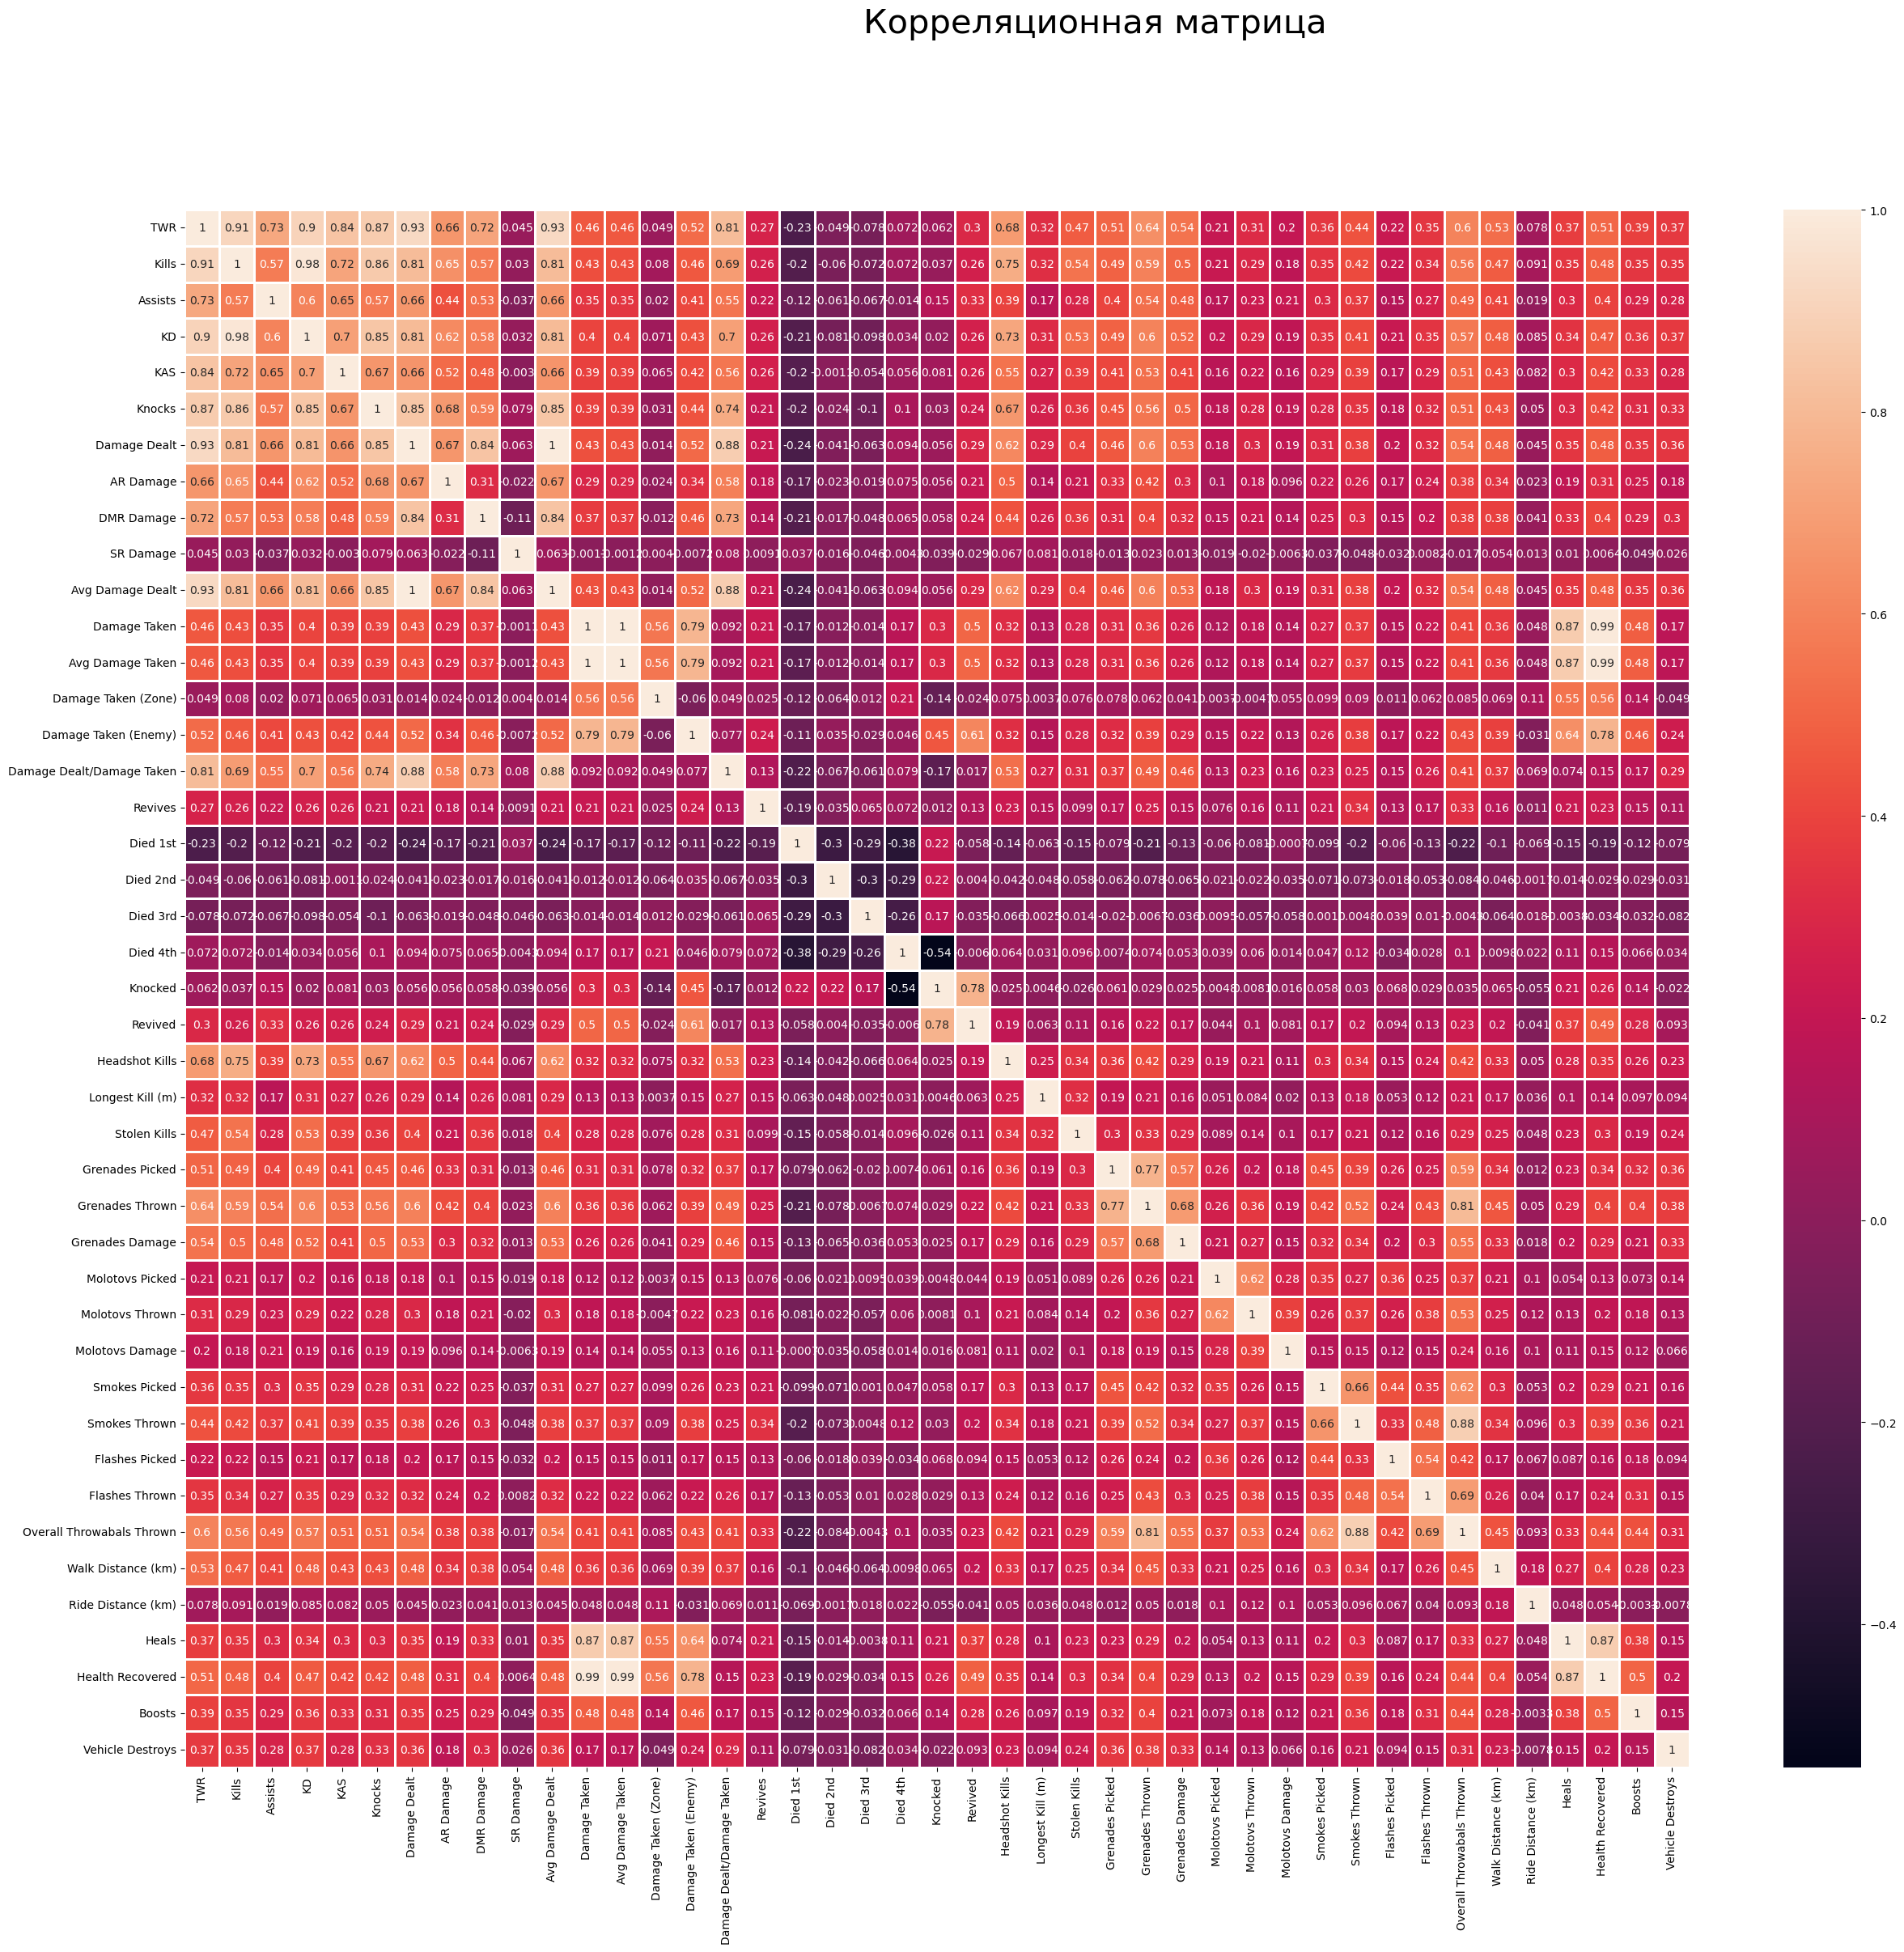

In [35]:
fig, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(boba.corr(), annot=True, linewidth=.9)

fig.suptitle("Корреляционная матрица", fontsize=30)

Заметная корреляция использования гранат (Granades Thrown = 0,59) в сравнении со слабой корреляцией молотовых (Molotovs Thrown = 0,29) (единственные представленные метательные оружия, которые могут нанести урон) показывает, что общая эффективность игрока по киллам достаточно сильно зависит именно от гранат. При этом, корреляция обоих предметов с "подобранными" и "кинутыми" (Picked and Thrown) разнится примерно на 10 пунктов, показывая что метательное оружие достаточно ситуативно и не всегда используется, даже при наличии такого оружия у игроков при себе.

Метательное оружие, которое не может нанести урон, а именно Flashes и Smokes показывают умеренную корреляцию (0,42 и 0,34 соответственно), а значит также показывают, что при частом их использовании улучшают результативность игроков, не смотря даже что напрямую не могут нанести никакого урона игрокам.

При этом самая большая разница между Picked and Thrown значениями среди всего метательного оружия показывают Flashes (разница в 12 пунктов), являясь самыми ситуативными и сложными для достижения более лучших результатов по киллам, но обгоняя молотов, при этом не имея способности нанести урон.

---
Наиболее результативные параметры показывают что игроки, часто завершающие убийства в голову персонажа, что хоть и сложно из-за игровых аспектов отдачи и маленькой модели головы, наиболее результативны и имеют сильную корреляцию в 0,75. При этом самые дальние киллы по дистанции показывают умеренную, близкую к слабой корреляции, являясь дополнительным подтверждением корреляции с AR Damage = 0,65 (урон с штурмовых винтовок, которые используются на дистанции менее 100м)

---
В дополнение к предыдущим показателям, также есть данные и по урону с DMR (марксманские (полуавтоматические) винтовки, использующиеся на дистанции в 100+ метров) и SR (снайперские винтовки, с использованием на такой же дистанции). Как из них видно, снайперские винтовки фактически никак не востребованы повсеместно и никак не коррелируют, а DMR, напротив, являются часто иcпользуемыми и эффективными, но в целом чуть менее эффективными, по сравнению с AR

---

Данный, совершенно не очевидный показатель по полученному урону от зоны с фактически нулевой корреляцией показывает, что при разном стиле игры (их основных два - игра от края зоны и от центра) может быть одинаково эффективным по киллам (что в макроисследовании игровых аспектов является очень важным, т.к сторонники разных игровых стилей спорят о лучшем из них с самого начала кибреспортивных мероприятий в дисциплине)

**Мы хотим отразить взаимосвязь между показателями на основе матрицы. Для этого будет произведен отбор показателей для большей репрезентотивности**


C:\Users\montl\AppData\Local\Temp\ipykernel_860\1345062431.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(boba[jaba].corr(), annot=True, linewidth=.9, vmin=0)


Text(0.5, 0.98, 'Корреляционная матрица')

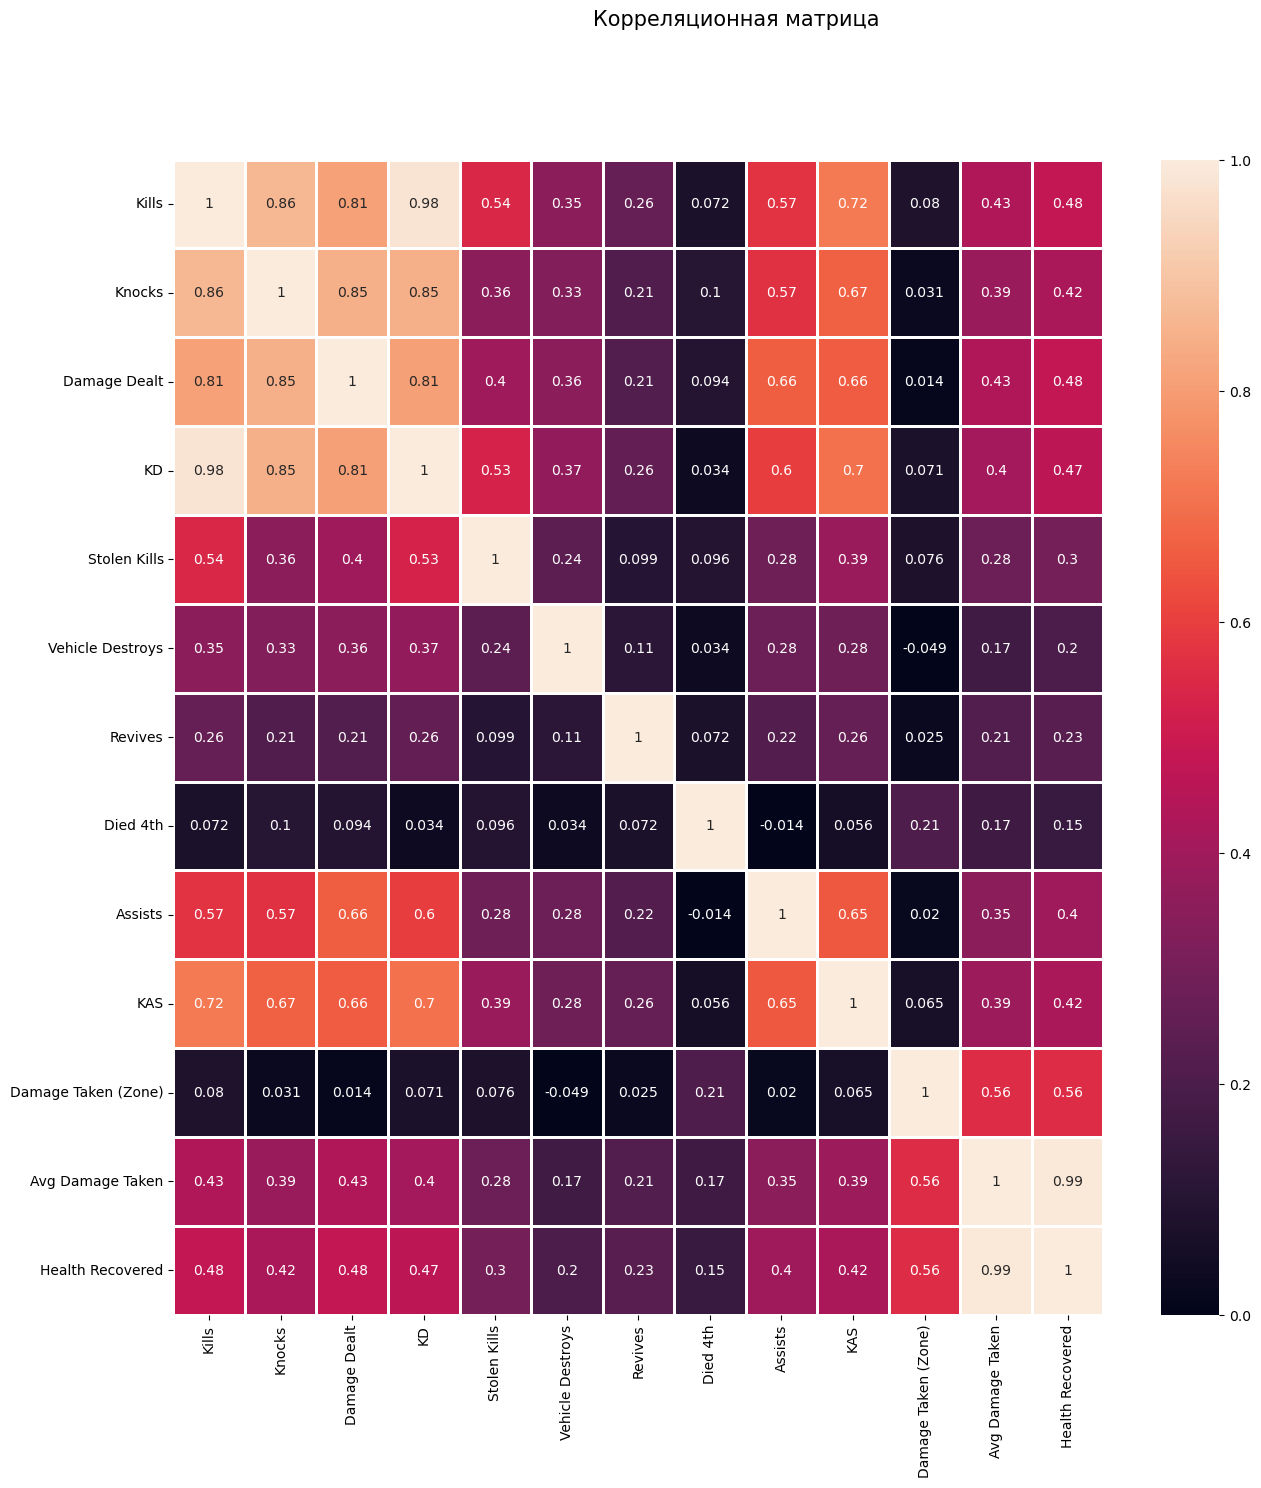

In [3]:
jaba = ["Kills", "Knocks", "Damage Dealt", "KD", "Stolen Kills", "Vehicle Destroys", "Revives", "Died 4th", "Assists", "KAS", "Damage Taken (Zone)", "Avg Damage Taken", "Avg Time Survived", "Health Recovered"]
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(boba[jaba].corr(), annot=True, linewidth=.9, vmin=0)
fig.suptitle("Корреляционная матрица", fontsize=15)


**Построение гистограммы**

Text(0.5, 0.98, 'Гистограмма по количеству убийств')

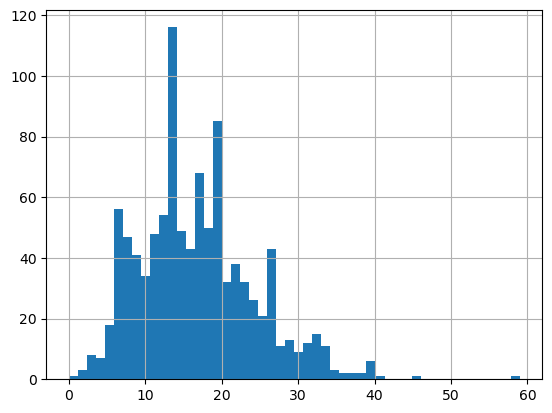

In [46]:
boba["Kills"].hist(bins = 50)

fig.suptitle("Гистограмма по количеству убийств", fontsize=10)

Самое большое часто встречающиеся значение равно 16 килам

**Построение ящика с усами**

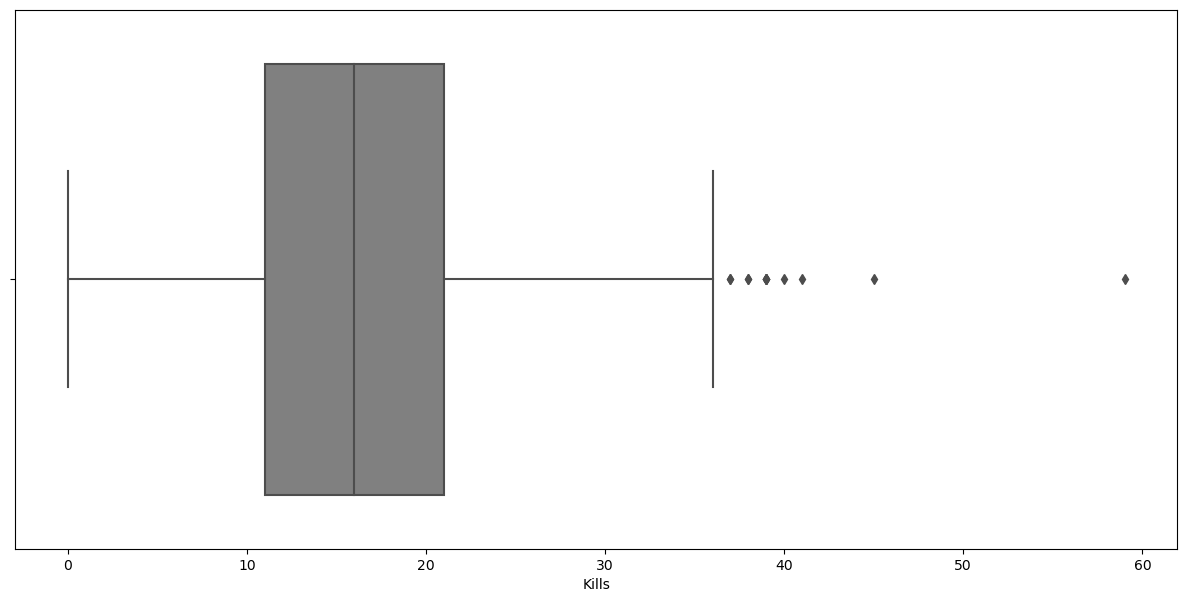

In [44]:
fig, axs = plt.subplots(figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=boba, x="Kills", color = 'grey')

Присутсвует 7 экстремальных выбросов. Самый большой выброс наблюдается у игрока с 59 убийствами. Отдельно стоит отметить, что это не должно влиять на наше исследование по двум причинам: Во-первых, мы изучаем участников киберспортивных турниров, а значит при прочих равных, игроки находятся в равных условиях и влияние на итоговый результат оказывает личный навык игроков. Во вторых, всего 7 выбросов на 1009 наблюдений не искажают выборку.

In [11]:
 boba.describe()

TWR        Kills      Assists           KD          KAS  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean     61.013875    16.764123     9.794846     1.003964     0.608325   
std      11.254356     7.601813     4.785740     0.505882     0.150495   
min      30.000000     0.000000     0.000000     0.000000     0.200000   
25%      53.000000    11.000000     6.000000     0.600000     0.500000   
50%      60.000000    16.000000     9.000000     0.900000     0.600000   
75%      69.000000    21.000000    13.000000     1.300000     0.700000   
max      95.000000    59.000000    36.000000     4.500000     1.000000   

            Knocks  Damage Dealt    AR Damage   DMR Damage    SR Damage  ...  \
count  1009.000000   1009.000000  1009.000000  1009.000000  1009.000000  ...   
mean     17.688801   3675.132607  1355.434886  1839.154014    58.041328  ...   
std       7.067579   1252.640327   625.081247   833.758517   174.057020  ...   
min       1.000000    537.100000   187.000000     0.000000     0.000000  ...   
25%      13.000000   2747.100000   932.800000  1234.200000     0.000000  ...   
50%      17.000000   3548.700000  1257.500000  1727.500000     0.000000  ...   
75%      22.000000   4382.600000  1680.800000  2315.900000    48.200000  ...   
max      52.000000   9888.200000  9410.000000  5039.300000  2501.800000  ...   

       Smokes Thrown  Flashes Picked  Flashes Thrown  \
count    1009.000000     1009.000000     1009.000000   
mean       31.004955       36.727453        7.418236   
std        12.691430       11.425833        5.314653   
min         1.000000        0.000000        0.000000   
25%        22.000000       29.000000        3.000000   
50%        30.000000       36.000000        6.000000   
75%        39.000000       43.000000       10.000000   
max        72.000000       88.000000       32.000000   

       Overall Throwabals Thrown  Walk Distance (km)  Ride Distance (km)  \
count                1009.000000         1009.000000         1009.000000   
mean                   64.943508           20.216056           70.427849   
std                    23.993133            3.461500           16.114719   
min                     9.000000            9.500000           35.300000   
25%                    48.000000           17.800000           58.100000   
50%                    63.000000           20.100000           68.900000   
75%                    81.000000           22.500000           81.500000   
max                   170.000000           33.800000          121.900000   

             Heals  Health Recovered       Boosts  Vehicle Destroys  
count  1009.000000       1009.000000  1009.000000       1009.000000  
mean     46.553023       2471.897721    66.542121          1.590684  
std      15.679877        705.766076    20.942061          1.617719  
min       4.000000        566.700000    16.000000          0.000000  
25%      36.000000       1980.800000    52.000000          0.000000  
50%      45.000000       2373.000000    63.000000          1.000000  
75%      56.000000       2916.500000    78.000000          2.000000  
max     114.000000       6159.900000   166.000000         13.000000  

[8 rows x 43 columns]

## Машинное обучение

In [1]:
 import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# наш исходный запарсенный датасет
file_path = 'C:/Users/montl/Downloads/combined_pubg_data_new2.xlsx'
data = pd.read_excel(file_path)

# 4 группы игроков
data['Avg Time Survived'] = data['Avg Time Survived'].apply(time_to_seconds)
attacker_features = ['Kills', 'Knocks', 'Damage Dealt', 'KD']
stealer_features = ['Stolen Kills', 'Vehicle Destroys']
teammate_helper_features = ['Revives', 'Died 4th', 'Assists', 'KAS']
survivor_features = ['Damage Taken (Zone)', 'Avg Damage Taken', 'Avg Time Survived', 'Health Recovered']

player_name_column = 'Player'
used_features = attacker_features + stealer_features + teammate_helper_features + survivor_features
all_columns = [player_name_column] + used_features

missing_columns = set(used_features) - set(data.columns)
if missing_columns:
    print(f"Отсутствующие столбцы: {missing_columns}")

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[used_features])
# методом kmeans разобьем на 4 кластера
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

role_mapping = {
    0: 'Attacker',
    1: 'Stealer',
    2: 'Teammate Helper',
    3: 'Survivor'
}

data['Role'] = data['Cluster'].map(role_mapping)
data['Efficiency'] = scaled_df.sum(axis=1)
data = data[all_columns + ['Role', 'Efficiency']]
grouped = data.groupby('Role')

# сохранялка, опять в ексель
output_file_path = 'C:/Users/montl/Downloads/clustered_pubg_data.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    for role, group in grouped:
        group = group.sort_values(by='Efficiency', ascending=False)
        top_10_percent_index = int(len(group) * 0.1)
        top_group = group.head(top_10_percent_index)
        if role == 'Attacker':
            columns_to_keep = [player_name_column] + attacker_features
        elif role == 'Stealer':
            columns_to_keep = [player_name_column, 'Kills'] + stealer_features
        elif role == 'Teammate Helper':
            columns_to_keep = [player_name_column, 'Kills'] + teammate_helper_features
        elif role == 'Survivor':
            columns_to_keep = [player_name_column, 'Kills'] + survivor_features
        
        top_group = top_group[columns_to_keep]
        top_group.to_excel(writer, sheet_name=role, index=False)

print(f"Куда сохраняем: {output_file_path}")

C:\Users\montl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\montl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Куда сохраняем: C:/Users/montl/Downloads/clustered_pubg_data.xlsx


* **Kills** - количество убийств
* **Knocks** - раненый игрок, находящийся в уязвимости, но при этом имеющий возможность восстановления от тиммейтов
* **Damage Dealt** - общий нанесенный урон по противникам
* **KD** - соотношение киллов к смертям игрока
* **Stolen Kills** - украденные киллы (когда противника "нокнула" другая команда, а игрок успел добить не свой "нок")
* **Vehicle Destroys** - уничтоженные автомобили 
* **Revives** - сколько тиммейтов человек "поднял" (восстановил из состояния нока)
* **Died 4th** - умерший четвертым в своей команде
* **Assists** - (пояснение по тексту)
* **KAS** - kills to assists - соотношение киллов к ассистам
* **Damage Taken (Zone)** - полученный урон от зоны
* **Avg Damage Taken** - средний полученный урон
* **Avg Time Survived** - среднее время выживания на карте
* **Health Recovered** - восстановленное здоровье

>Машинное обучение кластеризирует данные на 4 группы игроков по стилю. Стили мы выбрали такие: Attaker, Stealer, Teammate Helper и Surviver. Код определяет стиль игрока по основным параметрам, которые присущи тому или иному стилю игры, для Surviver, например, это: Время выживания, Полученный урон от зоны, Средний полученный урон и так далее. На основе всех этих характеристик в итоге, после класторизации, код выбирает 10% лучших игроков по показателям, а всех остальных удаляет, также как и побочные характеристики, которые не используются при класторизации. В итоге мы получаем 4 таблицы с 4-мя стилями игроков

**Attaker**:  самые результативные игроки по киллам и соотношению киллов к смертям, а также общему нанесенному урону противнику. Эти игроки зачастую играют на первых флангах команды и чаще других делают киллы, при этом имеют большую вероятность выбыть из матча намного раньше своих тиммейтов. 

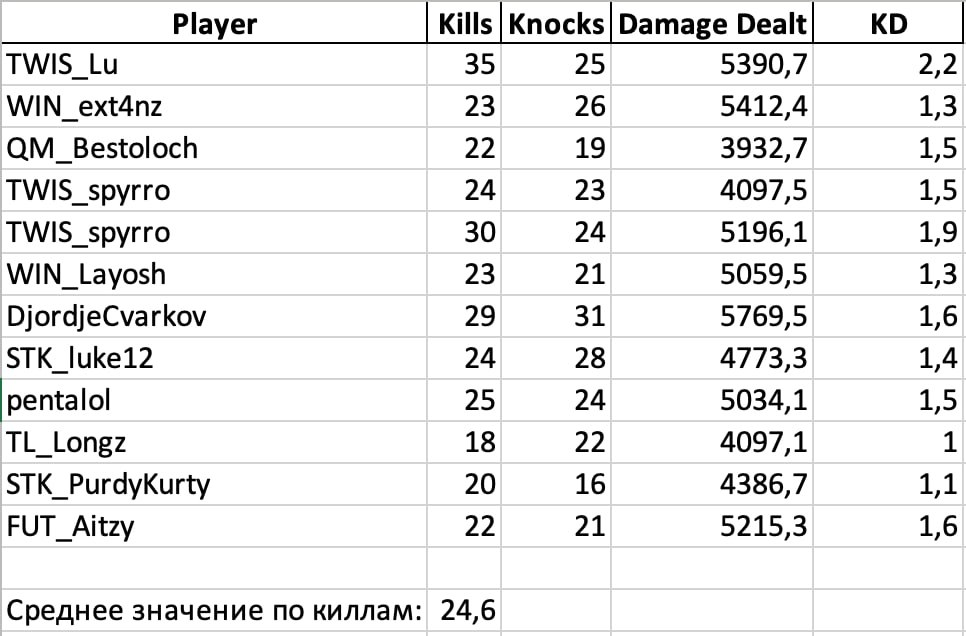

**Stealer**: весьма специфических стиль, который выделяется лишь двумя основными параметрами - киллы, которые человек украл у соперников (при "добитии" игрока, когда он находится в состоянии "нока" (ранения) и может лишь ползать), а также уничтоженные автомобили (в играх практически всегда уничтожаются автомобили противников, за редким исключением, что весьма и весьма усложняет ротации и хорошо подходит под этот стиль)

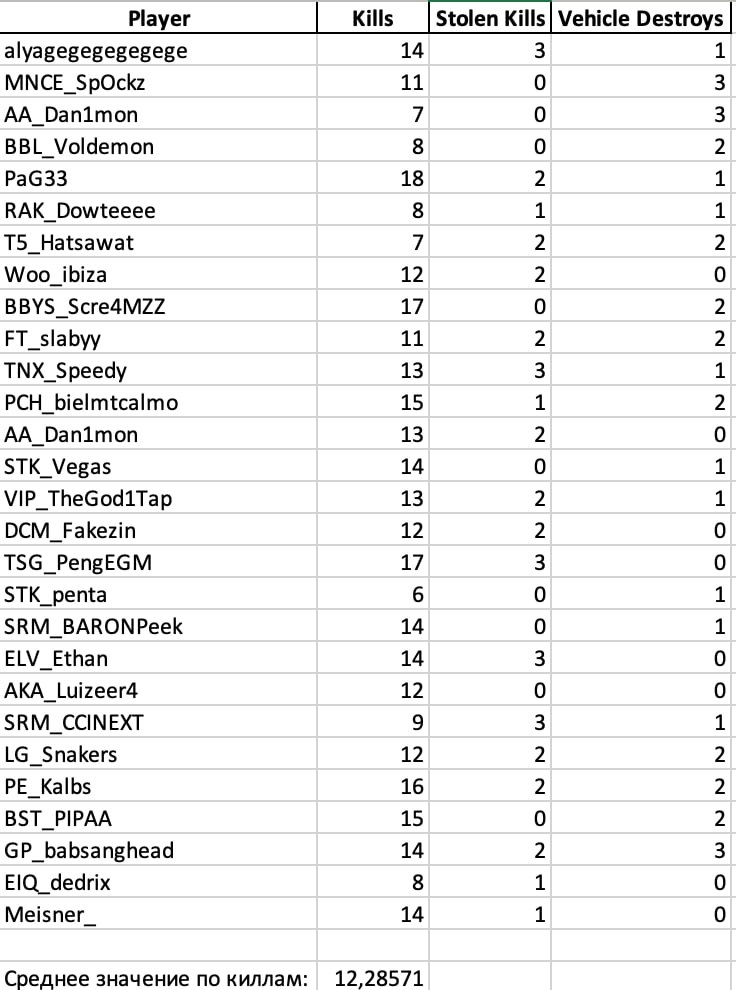

**Survivor**:игроки, наиболее долго находящиеся на картах, а также те, кто получает очень много урона и восстанавливает его (Avg Damage Taken + Avg Damage Taken) + те, кто получил больше всего урона от зоны Damage Taken (Zone) (наиболее безопасное место, т.к за безопасным кругом находится очень мало противников, что помогает выживать дольше)

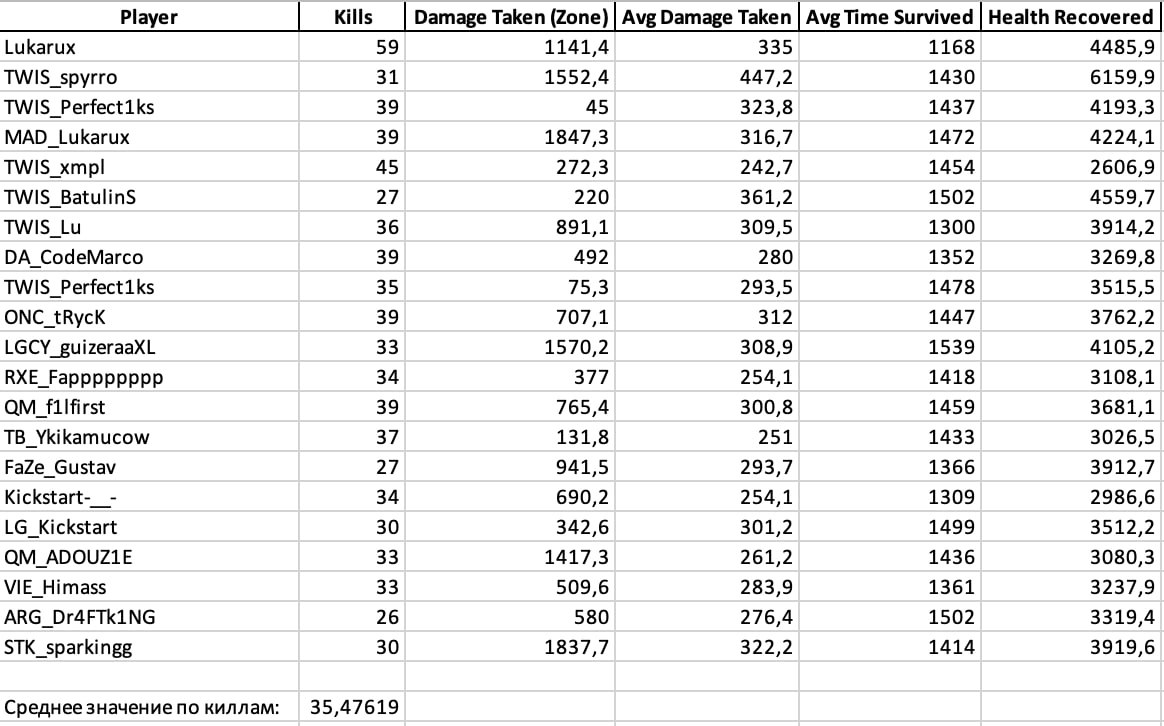


**Teammate Helper**: игроки, больше всего помогающие своей команде. Здесь включаются такие характеристики, как: Revives (поднятые тиммейты из состояния ранения), те кто больше всего сделал Assists (то есть например наносил урон по тому же противнику, что и его тиммейт, или добивал противников, "нокнутых" тиммейтом), а также KAS (kills to assists - соотношение киллов к помощи)

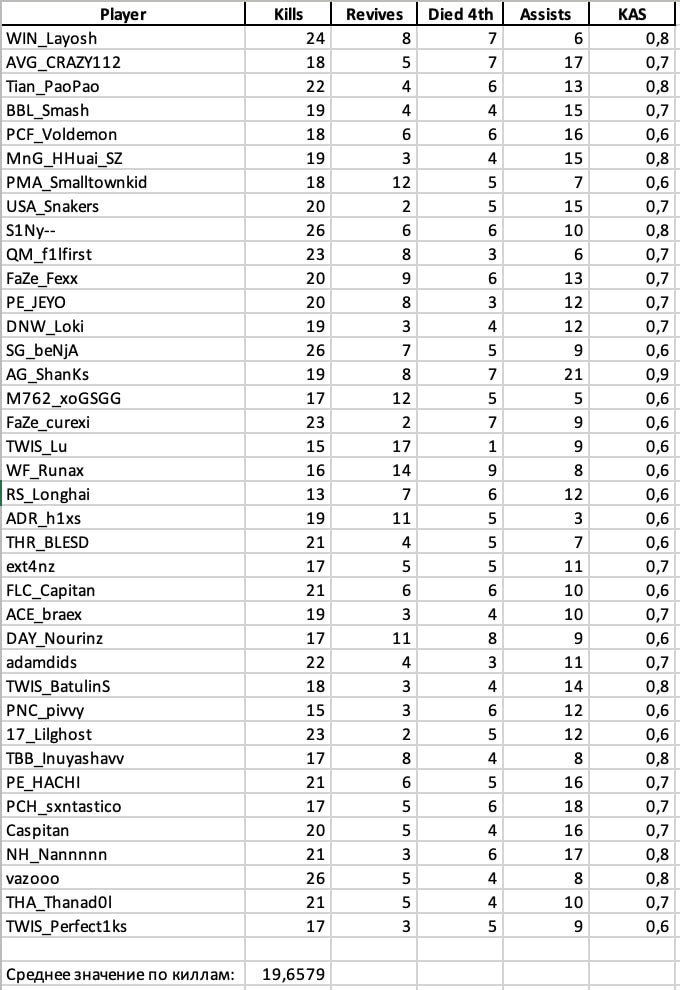

Наша изначальная гипотиза заключалась в том, что помимо основных и очевидных показателей, таких как урон, KD и так далее, на кол-во киллов могут сильно влиять побочные факторы. Как мы видим из машинного обучения, на основе класторизации были выделены разные игроки по стилям. После, в excell-файл мы добавили средние значения по киллам, сделанным топ 10-ю процентами игроков, попавшими под эти распределения. 
Как видно, в средних значениях лидирует стиль Survivor (~ 35 киллов), который при класторизации вообще не учитывает ни одно из очевидных значений. Далее идет Attaker c ~ 24 киллами, Teammate Helper c (~ 20 киллами) и Stealer ~ 12 киллов. Эти данные ярко показывают, что побочные показатели игроков при класторизации могут выделять достаточно эффективную группу и без прямого использования показателей стрельбы, что вдобавок к ранее упомянутым тезисам на основе корреляции подтверждает нашу основную гипотизу - урон и подобные характеристики, далеко не самое главное в матчах и не отражают реальную результативность команды и игрока.

# Итог

Наша гипотиза подтвердилась. Все тезисы озвучены ранее

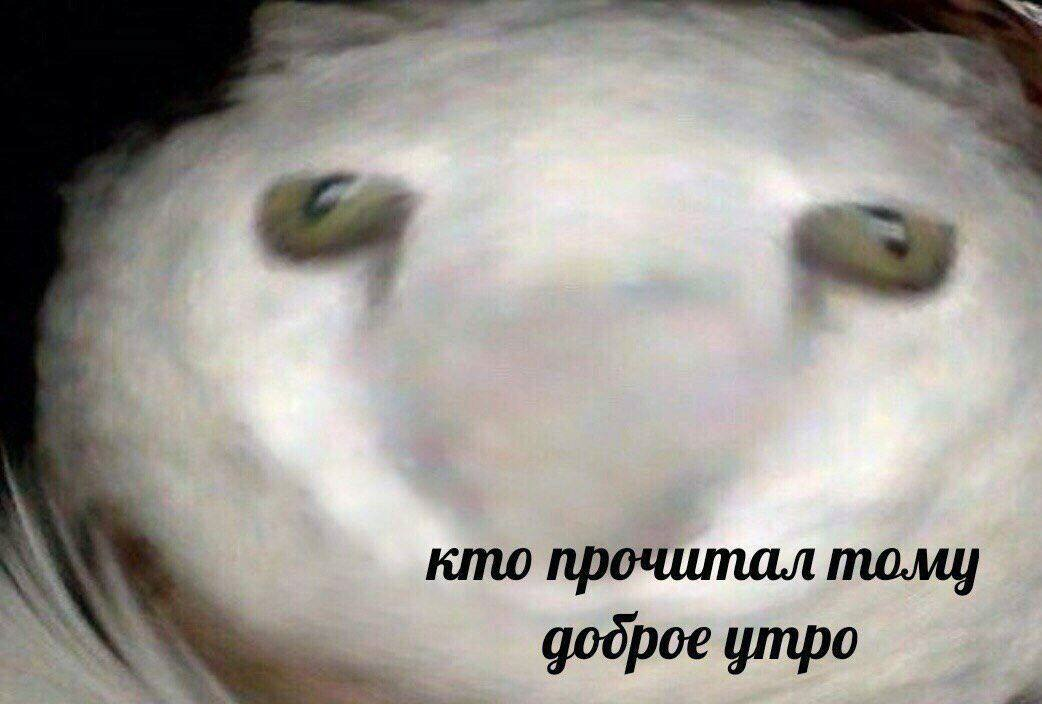